#### Libraries

In [14]:
import yfinance as yfinance
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

#### Load Time Series Data

In [33]:
stock_data = yfinance.download('AAPL', start='2024-01-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.734985,187.521338,182.993517,186.237618,82488700
2024-01-03,183.351761,184.973819,182.535751,183.321908,58414500
2024-01-04,181.023178,182.197418,179.998201,181.261998,71983600
2024-01-05,180.296707,181.869006,179.291637,181.102771,62303300
2024-01-08,184.655365,184.695178,180.615161,181.202281,59144500


#### Augmented Dickey Fuller Test
###### Check if its non stationary due to unit root
###### Yt = coef * Yt-1 + Et

In [6]:
adf_test = adfuller(stock_data['Close'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.583787
p-value: 0.874604
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


In [7]:
adf_test

(np.float64(-0.5837868226003383),
 np.float64(0.8746036169510483),
 0,
 256,
 {'1%': np.float64(-3.4561550092339512),
  '5%': np.float64(-2.8728972266578676),
  '10%': np.float64(-2.5728222369384763)},
 np.float64(1198.2779563579031))

#### Kwiatkowski Phillips Schmidt Shin (KPSS) Test
###### Verifying the stationarity when you suspect a deterministic trend
###### Yt = Tt + St + Et

In [10]:
kpss_test = kpss(stock_data['Close'], regression='ct') # 'c' for constant level stationarity, 'ct' for trend

print('KPSS Statistic: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])
print('Critical Values:')
for key, value in kpss_test[3].items():
    print('\t%s: %.3f' % (key, value))

KPSS Statistic: 0.189715
p-value: 0.019857
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


In [11]:
kpss_test

(np.float64(0.18971536457715082),
 np.float64(0.01985673828356844),
 10,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

#### Strict Stationary Vs Non-Strict Stationary

In [30]:
np.random.seed(0)
n = 500

strict_stationary_series = np.random.normal(0,1,n)
non_strict_stationary_series = np.concatenate([ np.random.normal(0,1,n//2), np.random.normal(0,2,n//2) ])

In [31]:
def ks_test_stationarity (series):
    split = len(series)//2
    series_first_half = series[:split]
    series_second_half = series[split:]
    stat, p_value =ks_2samp(series_first_half, series_second_half)
    return stat, p_value

ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationary_series)
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strict_stationary_series)

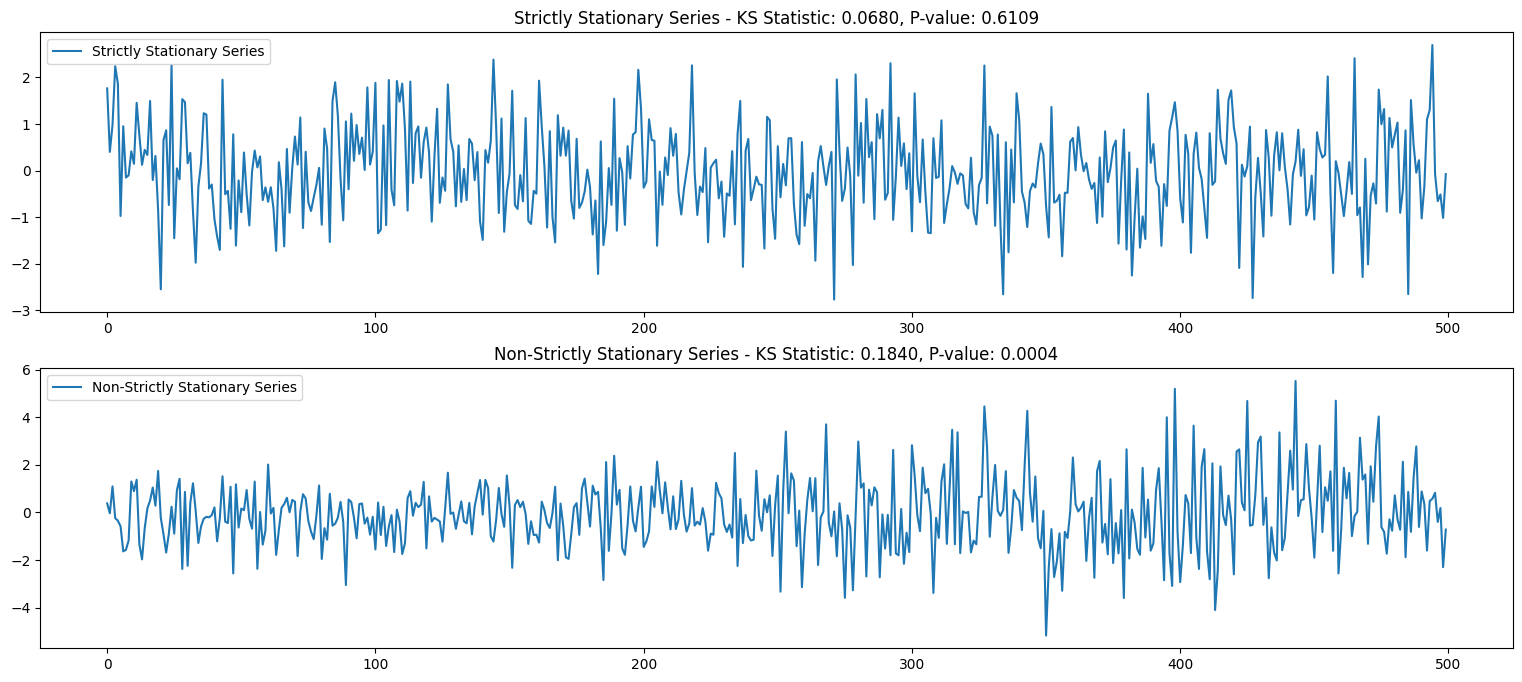

In [32]:
plt.figure(figsize=(19,8))

plt.subplot(211)
plt.plot(strict_stationary_series, label='Strictly Stationary Series')
plt.title('Strictly Stationary Series - KS Statistic: %.4f, P-value: %.4f' % (ks_stat_strict, ks_pvalue_strict))
plt.legend()

plt.subplot(212)
plt.plot(non_strict_stationary_series, label='Non-Strictly Stationary Series')
plt.title('Non-Strictly Stationary Series - KS Statistic: %.4f, P-value: %.4f' % (ks_stat_non_strict, ks_pvalue_non_strict))
plt.legend()
plt.show()